***
# <p style='text-align: center;'>`Laboratorio #1`</p>
***

<p style="text-align: center;">Pablo Alejandro Rivera Sánchez</p>
<p style="text-align: center;">Juan Enrique Aguirre López</p>

In [1]:
import functions # Archivo de funciones
import data
import pandas as pd

# Nota, esta celda tarda un poquito en correr

 ## `1. Portafolio Estrategia Pasiva`

In [2]:
# DataFrame de todos los archivos csv descargados del NAFTRAC
csv_files = functions.read_multiple_csv("files")
csv_df = csv_files[1]
csv_df.head(3)

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio,SEDOL,Unnamed: 1,Unnamed: 10
0,AMXL,AMERICA MOVIL L,Equity,11.86,15.58,"433,866,211.00","6,759,635,567.38","6,759,635,567.38",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
1,GFNORTEO,GPO FINANCE BANORTE,Equity,10.81,137.48,"44,842,100.00","6,164,891,908.00","6,164,891,908.00",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
2,WALMEX*,WALMART DE MEXICO V,Equity,10.63,65.40,"92,646,791.00","6,059,100,131.40","6,059,100,131.40",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN


In [3]:
# Tickers repetidos en todos los archivos, eliminando MXN
c_tickers = functions.get_constant_tickers(csv_df, 'MXN.MX')
c_tickers[0:5]

['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'AMXL.MX', 'ASURB.MX']

In [4]:
all_dates = functions.get_all_dates2(csv_files[0])
dates_fd = [functions.str_to_datetime(i, '%Y%m%d', '%Y-%m-%d') for i in all_dates]
dates_fd.sort()
dates_fd[0:5]

['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30', '2021-05-31']

In [5]:
# Precios mensuales, de acuerdo con las fechas anteriormente obtenidas
prices = data.prices
prices

Close                                                        \
                 AC.MX ALFAA.MX   ALSEA.MX    AMXL.MX    ASURB.MX BBAJIOO.MX   
Date                                                                           
2021-01-29   93.070000    12.90  23.110001  13.670000  322.529999  24.760000   
2021-02-26   94.769997    11.39  25.440001  13.390000  391.429993  24.030001   
2021-03-31  100.849998    11.80  30.280001  13.960000  363.029999  27.570000   
2021-04-30  108.459999    14.17  32.950001  14.150000  342.609985  32.119999   
2021-05-31  113.040001    13.98  33.410000  15.580000  363.279999  34.590000   
2021-06-30  115.620003    14.96  35.470001  15.000000  367.890015  35.759998   
2021-07-30  120.459999    15.16  40.369999  16.680000  361.609985  35.639999   
2021-08-31  129.369995    14.10  39.259998  19.770000  360.429993  38.439999   
2021-09-30  125.879997    14.31  41.610001  18.260000  385.769989  39.000000   
2021-10-26  125.160004    15.40  45.430000  18.000000  393.320007  40.459999   
2021-11-30  130.770004    15.33  36.689999  18.809999  392.829987  36.029999   
2021-12-31  130.520004    15.02  37.950001  21.690001  422.760010  36.799999   
2022-01-26  123.610001    14.58  40.790001  19.809999  402.649994  37.480000   
2022-02-28  135.119995    15.34  44.360001  18.510000  442.910004  49.750000   
2022-03-31  135.250000    15.11  49.860001  21.120001  443.929993  54.610001   
2022-04-29  129.490005    13.67  44.730000  19.860001  445.369995  50.389999   
2022-05-31  133.789993    15.12  42.150002  20.809999  429.950012  48.549999   
2022-06-30  132.500000    14.28  38.080002  20.549999  395.230011  40.310001   
2022-07-29  141.210007    14.01  39.660000  19.400000  384.000000  47.939999   
2022-08-31  137.149994    12.82  36.560001  17.170000  426.709991  42.020000   
2022-09-30  145.009995    12.80  36.150002  16.590000  396.000000  50.990002   
2022-10-31  161.860001    13.16  38.060001  18.700001  464.970001  55.779999   
2022-11-30  160.600006    13.50  38.799999  18.750000  478.500000  62.689999   
2022-12-30  158.039993    12.43  36.779999  17.600000  454.010010  61.380001   
2023-01-25  164.699997    13.64  44.599998  19.959999  544.619995  71.470001   

                                                         ...                \
            BIMBOA.MX  BOLSAA.MX CEMEXCPO.MX  CUERVO.MX  ... LIVEPOLC-1.MX   
Date                                                     ...                 
2021-01-29  38.520000  46.000000   11.760000  43.730000  ...     65.510002   
2021-02-26  39.299999  42.849998   13.940000  43.150002  ...     63.330002   
2021-03-31  42.900002  41.250000   14.420000  46.759998  ...     71.629997   
2021-04-30  40.540001  44.939999   16.090000  48.310001  ...     85.690002   
2021-05-31  43.849998  44.500000   16.809999  50.189999  ...     84.220001   
2021-06-30  43.889999  43.910000   16.820000  52.439999  ...     88.750000   
2021-07-30  45.880001  40.630001   16.240000  49.810001  ...     94.099998   
2021-08-31  50.820000  41.599998   16.500000  51.189999  ...     89.050003   
2021-09-30  58.040001  39.720001   14.890000  44.820000  ...     85.379997   
2021-10-26  57.439999  40.639999   13.870000  44.040001  ...     92.470001   
2021-11-30  56.220001  36.160000   13.300000  49.110001  ...     82.320000   
2021-12-31  62.970001  38.919998   13.990000  51.360001  ...     88.760002   
2022-01-26  62.389999  34.869999   12.530000  47.790001  ...     95.690002   
2022-02-28  63.070000  39.220001   10.520000  51.360001  ...     99.459999   
2022-03-31  60.060001  42.060001   10.690000  48.950001  ...    101.459999   
2022-04-29  62.900002  40.430000    8.980000  50.869999  ...    102.879997   
2022-05-31  64.720001  36.250000    9.260000  44.330002  ...    103.870003   
2022-06-30  65.370003  35.689999    7.830000  43.500000  ...     87.010002   
2022-07-29  72.040001  37.939999    8.230000  46.139999  ...     91.480003   
2022-08-31  66.220001  36.389999    7.470000  41.200001  ...

In [6]:
# Ponderaciones de los tickers repetidos obtenidas del primer archivo descargado
pond = functions.get_weights('files/NAFTRAC_20210129.csv', c_tickers, ['MXN.MX'])
pond[0:5]

[1.55, 1.36, 0.44, 12.29, 2.43]

In [7]:
# Información del capital, comisión y cash (% que queda afuera debido a posiciones de cash como MXN)
cash = functions.cash
total_cap = 1000000
comision = 0.00125

In [8]:
# DataFrame con la información anterior 
caps = functions.capital_values(total_cap, cash, pond)
caps

,Cash,Invested,Not Invested,Total Not Invested
Amount,3100.0,965600.0,31300.0,34400.0


In [9]:
# Títulos a comprar de acuerdo al capital, la ponderación y además considerando precios con comisión
titulos = functions.get_titulos(prices, '2021-01-29', comision, total_cap, pond)
titulos

array([ 166, 1052,  190, 8979,   75,  270,  528,  178, 5698,  205,   21,
        699,  148,  170,   61,  814,  923, 1201,   79,  532,  197,   74,
        113,  129,  379,   46,   78,   64,  953,  211, 1906])

In [10]:
# Inicialización de DataFrame para almacenar el cash del portafolio pasivo
res_df = pd.DataFrame(columns=['Amount'], index = [dates_fd])

In [11]:
# Función que devuelve el comportamiento/desempeño del portafolio creado, se itera por cada fecha
# Se puede observar la evolución del portafolio en cada fecha
monthly_reports = [functions.monthly_perf_pasive(c_tickers, pond, prices.loc[i].values, titulos, i, total_cap, res_df) for i in dates_fd]
monthly_reports[0]

,Tickers,Ponderación,Precio (2021-01-29),Títulos,Valor posición
0,AC.MX,1.55,93.070000,166.0,15449.62
1,ALFAA.MX,1.36,12.900000,1052.0,13570.80
2,ALSEA.MX,0.44,23.110001,190.0,4390.90
3,AMXL.MX,12.29,13.670000,8979.0,122742.93
4,ASURB.MX,2.43,322.529999,75.0,24189.75
5,BBAJIOO.MX,0.67,24.760000,270.0,6685.20
6,BIMBOA.MX,2.04,38.520000,528.0,20338.56
7,BOLSAA.MX,0.82,46.000000,178.0,8188.00
8,CEMEXCPO.MX,6.71,11.760000,5698.0,67008.48
9,CUERVO.MX,0.90,43.730000,205.0,8964.65


In [12]:
# Cantidad de cash que quedó fuera del portafolio
res_df.loc['2021-01-29']

,Amount
2021-01-29,4038.9


In [13]:
# Movimientos del capital en todas las fechas
cap_res = functions.get_pasive_capital_results(monthly_reports)

In [14]:
# Resultados de la inversión pasiva
p_results = functions.display_pasive_results(cap_res, dates_fd, 0)
p_results

,Capital,Rendimiento,Rend. Acum
2021-01-29,961561.10,NaN,NaN
2021-02-26,998509.07,0.038425,0.038425
2021-03-31,1058646.62,0.060227,0.098652
2021-04-30,1075245.36,0.015679,0.114332
2021-05-31,1141315.80,0.061447,0.175778
2021-06-30,1127827.51,-0.011818,0.163960
2021-07-30,1141847.51,0.012431,0.176391
2021-08-31,1196991.89,0.048294,0.224685
2021-09-30,1153159.64,-0.036619,0.188066
2021-10-26,1174843.71,0.018804,0.206871


El DataFrame anterior muestra los movimientos del capital invertido desde el periodo inicial hasta enero del año 2023. Podemos observar que el rendimiento cada mes varía bastante, cambiando de ser positivo a negativo en varias ocasiones, sin embargo, al final el rendimiento acumulado da una cantidad positiva y relativamente alta, lo anterior se podrá observar aún mejor en la siguiente gráfica. Este rendimiento final se refleja en el capital, el cual aumentó considerablemente considerando el periodo de tiempo dado.

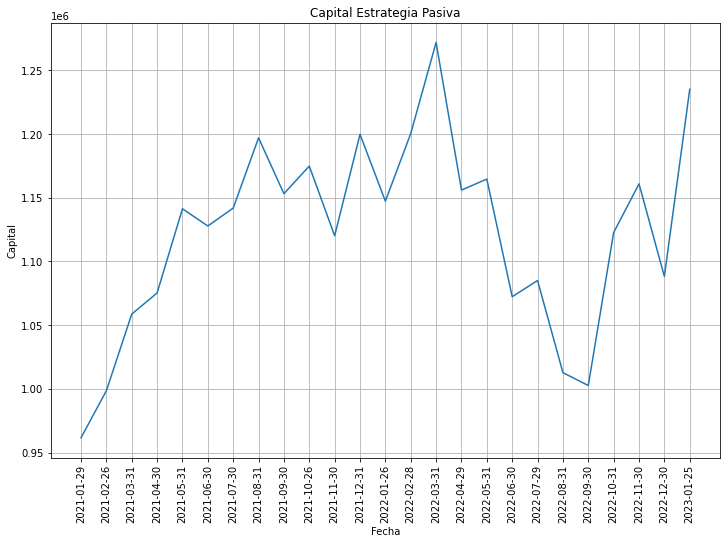

In [15]:
# Resultados de la inversión pasiva (gráfica)
p_resultsg = functions.display_pasive_results(cap_res, dates_fd, 1)

En la gráfica anterior se observa de mejor manera los movimientos del capital invertido a lo largo del tiempo. Se observa que al inicio del periodo la tendencia era a tener rendimientos mayormente positivos, llegando a su punto más alto en la mitad del periodo. Después, hubo un periodo donde hubo grandes pérdidas, afectando así el rendimiento positivo de los periodos anteriores. Al final, esta bajada no afectó tanto ya que en los últimos meses el capital se recuperó en su mayoría, llegando casi al nivel del punto más alto en la serie de tiempo. Será interesante comparar este movimiento con una estrategia de inversión activa más adelante. 

 ## `2. Portafolio Estrategia Activa`

In [16]:
# Tasa libre de riesgo mensual
rf = 0.0429 / 12

In [17]:
# Precios históricos diarios desde el inicio hasta Febrero
pcs = functions.get_ticker_prices(c_tickers, dates_fd[0], 1, '2022-03-01', '1d') # 1 día adelante

In [18]:
# Ponderaciones óptimas usando Teoría de Portafolio de Markowitz (minimize)
pond_mk = functions.mkwtz_port(rf, pcs)
pond_mk.head()

,W,Precio
Ticker,,
AC.MX,30.5286,135.119995
ALFAA.MX,0.0000,15.340000
ALSEA.MX,12.1490,44.360001
AMXL.MX,0.0000,18.510000
ASURB.MX,1.2444,442.910004


In [19]:
# Precios mensuales de Febrero en adelante para el análisis
pcs2 = data.prices[13:]

In [20]:
# Títulos comprados al inicio de acuerdo con los resultados del portafolio de Markowitz
# Se considera el capital inicial y la comisión
titulos_ac = functions.get_titulos(pcs, '2022-02-28', comision, 965600.0, pond_mk.iloc[:,0])
titulos_ac

array([2178,    0, 2641,    0,   27, 3445, 1380,    0,    0,    0,    0,
          0,    0,    0,    0, 6487,    0,    0,    0,    0,    0,  661,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [21]:
# Inicialización de DataFrame para almacenar el cash del portafolio pasivo
# Registra cada movimiento en el mismo en cada fecha si hay compras o ventas
res_df_a = pd.DataFrame(columns=['Amount'], index = [dates_fd[13:]])

In [22]:
# Características del portafolio activo inicial
initial_ap = functions.initial_active_port(pond_mk, pcs2, titulos_ac, dates_fd[13], caps['Invested'][0], res_df_a, caps['Total Not Invested'][0])
initial_ap['Títulos Act'] = initial_ap['Títulos']
initial_ap

,Tickers,Ponderación,Precio (2022-02-28),Títulos,Valor posición,Títulos Act
0,AC.MX,30.5286,135.119995,2178.0,294291.35,2178.0
1,ALSEA.MX,12.1490,44.360001,2641.0,117154.76,2641.0
2,ASURB.MX,1.2444,442.910004,27.0,11958.57,27.0
3,BBAJIOO.MX,17.7753,49.750000,3445.0,171388.75,3445.0
4,BIMBOA.MX,9.0282,63.070000,1380.0,87036.60,1380.0
5,GFINBURO.MX,22.4551,33.380001,6487.0,216536.07,6487.0
6,LIVEPOLC-1.MX,6.8193,99.459999,661.0,65743.06,661.0
7,NaN,99.9999,868.049999,16819.0,964109.16,16819.0


In [23]:
# Función que devuelve el comportamiento/desempeño del portafolio activo, se itera por cada fecha
# Se puede observar la evolución del portafolio en cada fecha
r = [functions.monthly_perf_active(initial_ap['Tickers'], initial_ap['Ponderación'], pcs2, initial_ap['Títulos Act'], dates_fd[13:][i], dates_fd[13:][i+1], res_df_a.iloc[i,0], res_df_a, comision, initial_ap) for i in range(len(dates_fd[13:]) - 1)]
r[0]

(         Tickers  Ponderación  Precio (2022-03-31)  Títulos  Valor posición
 0          AC.MX      30.5286           135.250000   2178.0       294574.50
 1       ALSEA.MX      12.1490            49.860001   2707.0       134971.02
 2       ASURB.MX       1.2444           443.929993     27.0        11986.11
 3     BBAJIOO.MX      17.7753            54.610001   3531.0       192827.91
 4      BIMBOA.MX       9.0282            60.060001   1380.0        82882.80
 5    GFINBURO.MX      22.4551            41.669998   6649.0       277063.82
 6  LIVEPOLC-1.MX       6.8193           101.459999    661.0        67065.06
 7            NaN      99.9999           886.839993  17133.0      1061371.22,
        Tickers  Ponderación  Precio (2022-03-31)  Títulos  Títulos nuevos  \
 0  GFINBURO.MX      22.4551            41.669998   6487.0          6649.0   
 1     ALSEA.MX      12.1490            49.860001   2641.0          2707.0   
 2   BBAJIOO.MX      17.7753            54.610001   3445.0          3531

In [24]:
# Movimientos de cash en cada fecha
res_df_a

,Amount
2022-02-28,35889.8744
2022-03-31,21133.692404
2022-04-29,34419.943744
2022-05-31,30695.66822
2022-06-30,43883.073694
2022-07-29,22294.781538
2022-08-31,35847.57947
2022-09-30,10.931822
2022-10-31,10.931822
2022-11-30,10.931822


In [25]:
# Resultados de la inversión activa
df1 = functions.display_active_results(r, initial_ap, dates_fd[13:], 0)
df1

,timestamp,capital,rend,rend_acum
0,2022-02-28,964109.16,NaN,NaN
1,2022-03-31,1061371.22,0.100883,0.100883
2,2022-04-29,964557.13,-0.091216,0.009667
3,2022-05-31,1002893.94,0.039746,0.049412
4,2022-06-30,883244.25,-0.119304,-0.069892
5,2022-07-29,1000881.62,0.133188,0.063296
6,2022-08-31,903420.33,-0.097375,-0.034080
7,2022-09-30,1000035.82,0.106944,0.072864
8,2022-10-31,1112936.63,0.112897,0.185761
9,2022-11-30,1150869.74,0.034084,0.219845


El DataFrame anterior muestra los movimiento del capital invertido desde el periodo inicial hasta enero del año 2023 ahora de un portafolio activo compuesto de 7 activos respectivamente. Al compararlo con respecto al mismo DataFrame de la estrategia activa, podemos ver que este tiene un comportamiento similar. Para ver precisamente las diferencias será mejor analizar la gráfica así como los rendimiento promedio mostrados en el DataFrame final. Sin embargo, podemos destacar que con esta estrategia terminamos con un capital final ligeramente mayor, teniendo un rendimiento acumulado del 32\%.

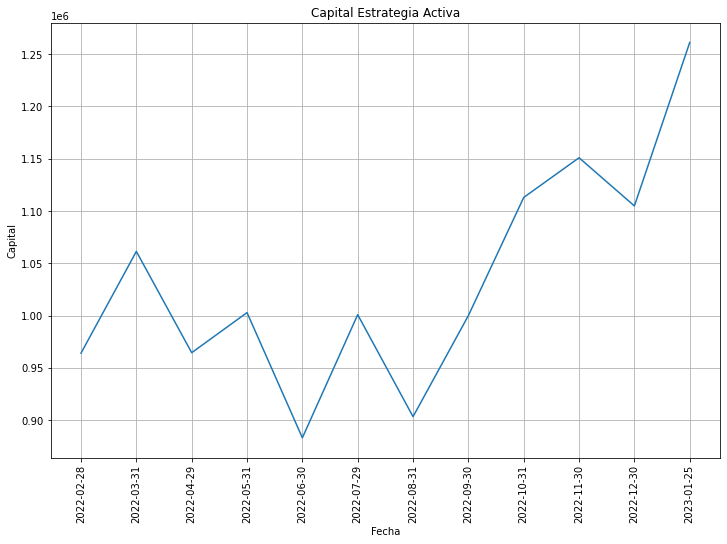

In [26]:
# Resultados de la inversión activa en gráfica
df1_g = functions.display_active_results(r, initial_ap, dates_fd[13:], 1)
df1_g

La gráfica nos muestra los movimientos del capital de la estrategia activa. Al inicio, el capital se mantiene mayormente por debajo del capital inicial invertido y, para el final del periodo, parece tener un aumento exponencial. Esto es lo opuesto a la estrategia pasiva, la cual parecía tener más variaciones a lo largo del tiempo.

In [27]:
# Resultados de las comisiones a lo largo del periodo de tiempo
df2 = functions.get_comission_history(r, initial_ap, dates_fd[13:])
df2

,timestamp,titulos_totales,titulos_compra,comisión,comision_acum
0,2022-02-28,16819.0,16819.0,1205.136446,1205.136446
1,2022-03-31,17133.0,314.0,18.422200,1223.558646
2,2022-04-29,16809.0,-324.0,16.628600,1240.187246
3,2022-05-31,16905.0,96.0,11.595600,1251.782846
4,2022-06-30,16568.0,-337.0,16.504888,1268.287734
5,2022-07-29,16916.0,348.0,26.951676,1295.239410
6,2022-08-31,16565.0,-351.0,16.962200,1312.201610
7,2022-09-30,16788.0,223.0,55.301962,1367.503572
8,2022-10-31,16788.0,0.0,0.000000,1367.503572
9,2022-11-30,16788.0,0.0,0.000000,1367.503572


La tabla anterior, que muestra las comisiones de las compras y ventas en todas las fechas para la estrategia activa, nos devuelve que las comisiones no son tan elevadas como creíamos que iban a hacer. La cantidad más grande fue al inicio, cuando se compra por primera vez el portafolio eficiente, posteriormente los ajustes adiciones no son tan costosos y la comisión total pagada o acumulada tampoco es una cantidad grande si la comparamos con el capital invertido. 

 ## `3. Portafolio Estrategia Activa`

In [28]:
# Resultados finales/comparación final
df_final = pd.DataFrame(columns = ['Medida' , 'Descrpición', 'Inv Activa', 'Inv Pasiva'])
df_final['Medida'] = ['rend_m', 'rend_c', 'sharpe']
df_final['Descrpición'] = ['Rendimiento Promedio Mensual', 'Rendimiento Mensual Acumulado', 'Sharpe Ratio']
df_final['Inv Activa'] = [df1['rend'].mean(), df1['rend_acum'].iloc[-1], (df1['rend'].mean() - rf) / df1['rend'].std()]
df_final['Inv Pasiva'] = [p_results['Rendimiento'].mean(), p_results['Rend. Acum'].iloc[-1], (p_results['Rendimiento'].mean() - rf) / p_results['Rendimiento'].std()]

df_final

,Medida,Descrpición,Inv Activa,Inv Pasiva
0,rend_m,Rendimiento Promedio Mensual,0.029206,0.012166
1,rend_c,Rendimiento Mensual Acumulado,0.321263,0.291977
2,sharpe,Sharpe Ratio,0.257479,0.144155


Finalmente, la tabla anterior muestra un resumen de las estrategias que seguimos, podemos ver 3 medidas de comparación en las cuales el portafolio con una estrategia de inversión activa es mayor a la estrategia pasiva. A pesar de que el rendimiento promedio mensual para la inversión activa es casi el triple que lo de la pasiva, el rendimiento mensual acumulado se logra casi equiparar. Atribuímos esto al costo que tuvimos que pagar por el rebalanceo del portafolio cada mes. Además, el capital final de ambas estrategias termina siendo muy similar, teniendo una variación de únicamente \$26,000 pesos (contando las compras y ventas).

Cabe mencionar que el portafolio de estrategia activa se compone únicamente de 7 activos, esto fue resultado de obtener el portafolio eficiente con la función de minimize. Utilizando una selección diferente y teniendo más activo en el portafolio activo, los resultados podrían variar y estar todavía aún más cercanos. 

Con esto en cuenta, concluiríamos que, debido a que los resultados son similares, va a depender totalmente del perfil del inversionista. Por ejemplo, una persona que es aversa al riesgo o propensa a la paranoia estaría más tranquila con un portafolio pasivo, ya que no vería tantos movimientos en sus posiciones ni cambios abruptos en el portafolio, y se evitaría sorpresas que no sucederían con un portafolio pasivo. En cambio, una personas menos aversa al riesgo, no le molestaría tener estos movimientos y cambios bruscos en su portafolio, y buscaría aprovechar ineficiencias en el mercado y así obtener rendimiento más altos, en este caso un portafolio activo sería más conveniente para esta persona. 

Otra consideración son los costos de administración del manager del portafolio, lo cual reduciría más el rendimiento extra obtenido por la inversión activa. Es por esto y por lo anteriormente mencionado, que nuestra recomendación personal sería optar por un portafolio pasivo ya que no vemos óptimo estar al pendiente del portafolio activo cada mes por una diferencia mínima de rendimiento, el estrés y el agotamiento de lidiar con el portafolio activo por un 2.6\% más de rendimiento no vale la pena.
